# Heat Transfer
In this case-study, you'll evaluate multiple techniques to determine the rate of heat transfer down the length of a rod heated at one end. You'll be determining the temperature distribution in that rod as a function of time and distance using multiple techniques (assumed to be one-dimensional):
- Experimental solution
- Analytical solution
- Two numerical solutions

You'll need a few tools:
- A basic understanding of the heat equation and an example solution,
- Two numerical techniques to estimate the solution of the heat equation:
    - finite element (manual)
    - finite element (with software)
- A safe, basic experimental setup available to you in your apartment with purchase of an item that's less than $10.
    - With an ESP32 and one MAX6675 thermocouple amplifier with a thermocouple to collect temperature data from the experiment.
    - A small diameter brass or steel rod (available from the TA or Instructor)

## 1-D Heat Equation
The heat equation is a well-known partial differential equation that describes the distribution of heat in a given region over time subject to boundary conditions. We'll solve for the temperature as a function of position and time given a constant heat flux at one end of the rod. 

### Analytical Solution

For a rod of length $L$ with a constant cross-sectional area $A$ and a constant thermal conductivity $k$, the heat equation is given by:

$$
\begin{equation}
\frac{\partial T}{\partial t} = \alpha \frac{\partial^2 T}{\partial x^2}
\end{equation}
$$

where $\alpha$ is the thermal diffusivity equal to $k/\rho C_p$ where $k$ is the thermal conductivity, $\rho$ is the density, and $C_p$ is the specific heat capacity. 

The solution to that specific one-deminensional semi-infinite scenario for a constant heat flux is:

$$
\begin{equation}
T(x,t) = T_0 + \frac{2q^{''}_o(\alpha t/\pi)^{0.5}}{k} \exp \left( \frac{-x^2}{4 \alpha t} \right) - \frac{q^{''}_o x}{k} erfc \left( \frac{x}{2 \sqrt{\alpha t}} \right) \tag{2}
\end{equation}
$$

where $T_0$ is the initial temperature of the rod, $q^{''}_o$ is the constant heat flux at the end of the rod, and $erfc$ is the complementary error function.

The solution for a constant surface temperature is:

$$
\begin{align}
T(x,t) - T_i = (T_s - T_i)\cdot \left[1 - erf \left( \frac{x}{2\sqrt{\alpha t}} \right) \right] \tag{3a}\\
q^{''}_s(t) = \frac{k(T_s - T_i)}{\sqrt{\pi \alpha t}} \tag{3b}
\end{align}
$$
    
where $T_s$ is the surface temperature, $T_i$ is the initial temperature, and $q^{''}_s$ is the heat flux at the surface.

## **Task 1 Description**:
Define two functions such that you can evaluate the temperature distribution in a rod as a function of time and distance using the above equations. The first function should be for a constant heat flux and the second function should be for a constant surface temperature. The material properties are not inputs to the function but are constants defined for tool steel or brass. Those two functions are then used to evaluate the temperature distribution in a rod as a function of time and distance for the two cases.

There should be two plots with each plot having multiple curves for the temperature as a function of distance for at least 3 but no more than 8 different times up to 10 seconds. The two plots should have a title, axis labels, and a legend.

### Numerical Solution

This is the same scenario discussed in the [Ansys lecture](https://clint-bg.github.io/comptools/lectures/20-Ansys.html). Pieces of that lecture will be repeated here.

<img src="https://github.com/clint-bg/comptools/blob/main/lectures/supportfiles/1DHeatEqImg.png?raw=true" width="600">

<img src="https://github.com/clint-bg/comptools/blob/main/lectures/supportfiles/1DHeatEqImg2.png?raw=true" width="600">

The above can be programmed and solved with odeint with python. An example scenario is given below.

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [50]:
totallength = 0.2
sections = np.arange(0,100,1)
dx = totallength/sections[-1]
alpha = 1e-4

This is the constant temperature scenario where the first section is at a given temperature and stays that way.

In [51]:
#initial temps
Temps = np.ones(len(sections))*298
Temps[0] = 500
#time array
times = np.linspace(0,60,200)

In [52]:
def dTdt(T,time): #T is an array
    dTdt = [0]
    for each in range(1,len(sections)-1):
        dTdt.append(alpha/dx**2*(T[each+1] - 2*T[each] + T[each-1]))
    dTdt.append(alpha/dx**2*(T[-2] - 2*T[-1] + T[-2])) #adiabatic end 
    return dTdt

In [53]:
sol = odeint(dTdt,Temps,times)

In [54]:
sol.shape

(200, 100)

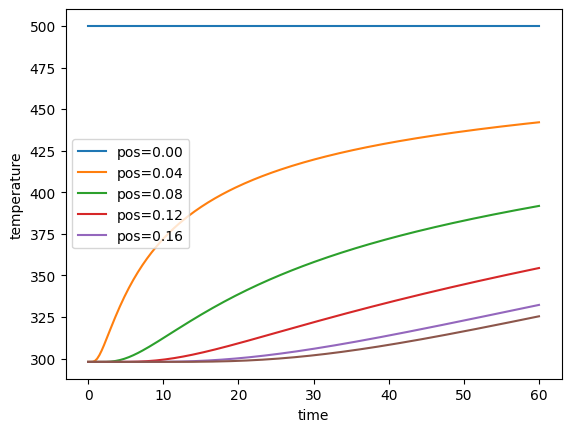

In [55]:
xpos = np.arange(0,len(sections)*dx,dx)
for j in range(len(sections)):
    if j%20 == 0:
        plt.plot(times,sol.T[j],label=f'pos={xpos[j]:1.2f}')
        pass
plt.plot(times,sol.T[-1]);plt.legend()
plt.xlabel('time');plt.ylabel('temperature')
plt.show()

#### Euler method
The below is an alternate method whose accuracy can be dependent on the values of dt, alpha, and dx.


The numerical solution treats a finite section of the rod to have a constant temperature and properties. Discretization of Equation 1 for a similar 1-D scenario results in the following equations where 4b is for the last node furthest from the heat source and 4a is for all other nodes: 

$$
\begin{align}
T[i+1,j] = T[i,j] + \alpha\cdot\delta t/\delta x^2\cdot(T[i,j+1]-2\cdot T[i,j]+T[i,j-1]) \tag{4a} \\
T[i+1,j] = T[i,j] + \alpha\cdot\delta t/\delta x^2\cdot(T[i,j-1]-2\cdot T[i,j]+T[i,j-1]) \tag{4b}
\end{align}
$$

where $i$ is the time index and $j$ is the spatial index. The initial condition is $T[0,j] = T_0$ for all $j$ and the boundary condition is $T[i,0] = T_0$ for all $i$.

## **Task 2 Description**: 
Plot the temperature distribution in a rod as a function of time and distance using the above 1-D numerical equations (using the ). Use the same properties as in Task 1. The plots should have a title, axis labels, and a legend. Compare the numberical result to the analytical solution as a function of time for a given position.

Note that the above analytical solution is assuming an infinitely long rod. Therefore, make sure the numerical solution has a sufficiently long rod (typically twice as long as the distance where the temperature changers are occuring). 

### Comparison between the above two methods

## **Task 3 Description**: 
Compare the analytical and numerical result as a function of time for a given position along the rod (given a constant surface temperature). The plots should have a title, axis labels, and a legend. Also include an estimate of some measure of accuracy comparison whether that's an r-squared value or other (like a mean absolute percent error).

### Use of Software to Solve the Heat Equation: Ansys Workbench


## **Task 4 Description**:
Use Ansys Workbench to obtain a plot of the temperature in the rod for one of the two above boundary conditions (constant surface temperature or constant heat flux).

### Experimental results

## **Task 5 Description** 
Obtain experimental results with the ESP32, MAX6675, thermocouple, small diameter rod, and lighter. A rod is fitted with one thermocouple at 5-10 cm away from the flame. The rod is safely heated with the lighter at one end. The rod can be supported on a stand. The temperature is recorded with an ESP32 and the data is sent to a phone via bluetooth and then saved and plotted. Results are compared to the analytical and numerical solutions.

Example results are below.

In [11]:
#import file from folder
import matplotlib.pyplot as plt
import pandas as pd
exdata = pd.read_csv('/Users/clintguymon/Downloads/brassheatingrod.txt', header=3)[:-1].astype(float)
exdata.tail()

,Small Thermocouple (C),Timestamp (seconds)
827,51.46,447.12
828,51.46,447.32
829,51.20,447.52
830,51.20,447.72
831,50.95,447.92


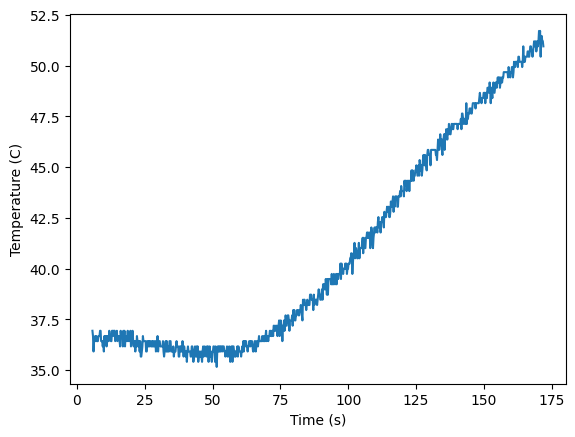

In [13]:
plt.plot(exdata[exdata.columns[1]]-276,exdata[exdata.columns[0]])
plt.plot()
plt.xlabel('Time (s)')
plt.ylabel('Temperature (C)')
plt.show()
#title='Brass Heating Rod', grid=True, legend=False)

## **Task 6: Document your Experience**
Document your experience with the above tasks in a write-up according to the suggestions [here](https://clint-bg.github.io/comptools/casestudies/casestudydocs.html).

## Heat Transfer Project Rubric
| Task | Points | Some criteria |
| --- | --- | --- |
| Code Development | 10 | Analytical and numerical functions are generated to yield the temperature at any point along the rod and a given time are developed with python and are plotted. |
| Experimental Data | 15 | Experimental data is collected where the temperature upon exposure to a heat source is collected for a given time frame at a given distance. Data at multiple distances is recommended. Data can also be collected with different materials (copper, steel, or brass). |
| Comparison | 10 | A plot showing the experimental and modeling result for the temperature as a function of time |
| Writeup | 25 | Documentation is complete according to the [Case Study Documentation](https://clint-bg.github.io/comptools/casestudies/casestudydocs.html). It's important to show evidence (plot or plots) of the modeling and experimental results and discuss the implications. |
| Total | 60 |   |

Note the intent is to gain experience with the modeling and experimental process and to compare those results. The modeling and experimental results may not be perfect.  